In [1]:
import numpy as np
import pandas as pd

In [12]:
f = open('M3_TSP_test.txt', 'r')
m = f.read()
# print(m)
f.close()

In [11]:
with open('M3_TSP_test.txt') as f:
    m = f.read()
    # print(m)

In [15]:
with open('M3_TSP_test.txt') as f:
    for i in f:
        s = f.readline()
#         print(s)

In [23]:
pd.read_csv('M3_TSP_test.txt')

In [2]:
df = pd.read_csv('M3_TSP_test.txt', skiprows = 21, sep = '\t')
print(df)

              Date/Time  Depth water [m]  Gear ID  Press [dbar]  Temp [°C]  \
0      2009-02-13T18:00              715        1           NaN     0.1192   
1      2009-02-13T18:00              648        2       655.040    -0.1530   
2      2009-02-13T18:00              623        3           NaN    -0.2012   
3      2009-02-13T18:00              597        4           NaN    -0.4077   
4      2009-02-13T18:00              571        5       578.189    -0.7645   
...                 ...              ...      ...           ...        ...   
20292  2009-02-23T06:00              571        5       578.758    -1.1235   
20293  2009-02-23T06:00              520        8       525.192    -1.3500   
20294  2009-02-23T06:00              468        6           NaN    -1.4966   
20295  2009-02-23T06:00              417        9       419.851    -1.5500   
20296  2009-02-23T06:00              365        7       369.487    -1.7734   

          Sal  
0      34.593  
1      34.565  
2         NaN  

In [13]:
Sensor1 = df[df['Gear ID'] == 1]
Sensor1.to_csv('Sensor1.txt', sep = '\t')
np.save('Sensor1.npy', Sensor1)
Sensor2 = df[df['Gear ID'] == 2]
np.savez('Sensors_1_2.npz', Sensor1, Sensor2) # сохранение нескольких массивов

print(Sensor1)

              Date/Time  Depth water [m]  Gear ID  Press [dbar]  Temp [°C]  \
0      2009-02-13T18:00              715        1           NaN     0.1192   
9      2009-02-13T18:05              715        1           NaN     0.1154   
16     2009-02-13T18:10              715        1           NaN     0.1218   
23     2009-02-13T18:15              715        1           NaN     0.1175   
30     2009-02-13T18:20              715        1           NaN     0.1157   
...                 ...              ...      ...           ...        ...   
20259  2009-02-23T05:40              715        1           NaN    -0.6111   
20267  2009-02-23T05:45              715        1           NaN    -0.6096   
20274  2009-02-23T05:50              715        1           NaN    -0.6097   
20281  2009-02-23T05:55              715        1           NaN    -0.6104   
20288  2009-02-23T06:00              715        1           NaN    -0.6099   

          Sal  
0      34.593  
9      34.609  
16     34.614  

<ipython-input-15-d020bc296817>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sensor1['Date/Time'] = pd.to_datetime(Sensor1['Date/Time'])


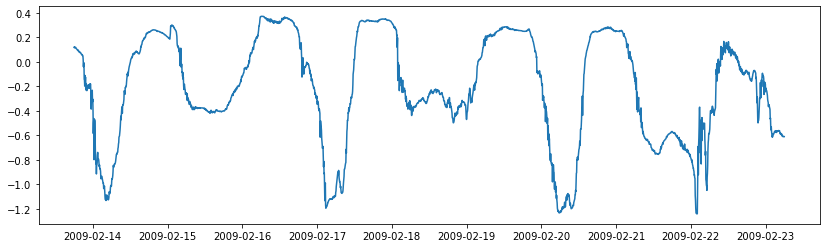

In [15]:
import matplotlib.pyplot as plt
import datetime
Sensor1['Date/Time'] = pd.to_datetime(Sensor1['Date/Time'])
fig = plt.figure(figsize = (14, 4))
plt.plot(Sensor1['Date/Time'], Sensor1['Temp [°C]'])

plt.show()

<ipython-input-52-113a7f7baeed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sensor1['Temp [°C]_s'] = Sensor1['Temp [°C]'].rolling(window = 100, center = True).mean()


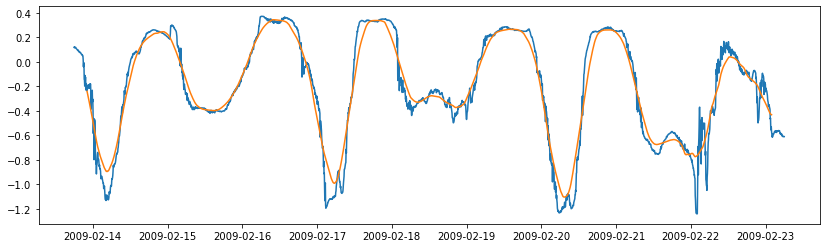

In [52]:
fig = plt.figure(figsize = (14, 4))
Sensor1['Temp [°C]_s'] = Sensor1['Temp [°C]'].rolling(window = 100, center = True).mean() 
plt.plot(Sensor1['Date/Time'], Sensor1['Temp [°C]'])
plt.plot(Sensor1['Date/Time'], Sensor1['Temp [°C]_s'])

plt.show()

In [31]:
np.argmin(Sensor1['Temp [°C]_s'])
Sensor1['Date/Time'].iloc[np.argmin(Sensor1['Temp [°C]_s'])]

Timestamp('2009-02-20 07:15:00')

In [116]:
sigma = Sensor1['Temp [°C]_s'].std()
print(sigma)

0.3803638136104478


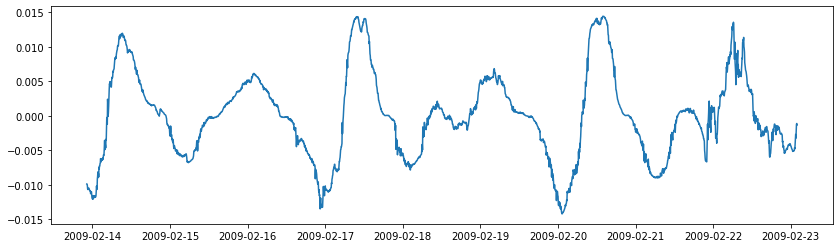

In [35]:
dT = np.diff(Sensor1['Temp [°C]_s'])
fig = plt.figure(figsize = (14, 4))
plt.plot(Sensor1['Date/Time'][1:], dT)

plt.show()

<ipython-input-79-652bbeeeb1f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sensor1['Temp [°C]_new'] = (Sensor1['Temp [°C]']).rolling(window = 20, center = True).apply(newF)


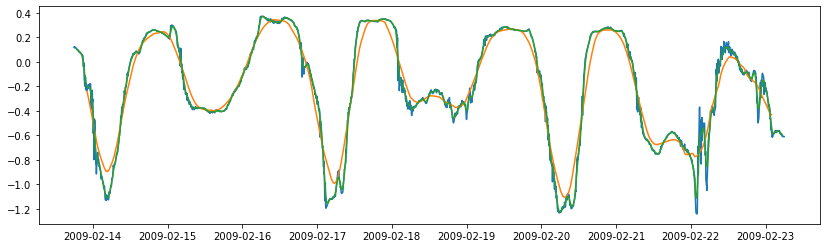

In [79]:
def newF(a):
    weights = np.sin(np.linspace(0, np.pi, len(a)))
    return np.sum(a*weights) / np.sum(weights)

fig = plt.figure(figsize = (14, 4))
Sensor1['Temp [°C]_new'] = (Sensor1['Temp [°C]']).rolling(window = 20, center = True).apply(newF)
plt.plot(Sensor1['Date/Time'], Sensor1['Temp [°C]'])
plt.plot(Sensor1['Date/Time'], Sensor1['Temp [°C]_s'])
plt.plot(Sensor1['Date/Time'], Sensor1['Temp [°C]_new'])

plt.show()

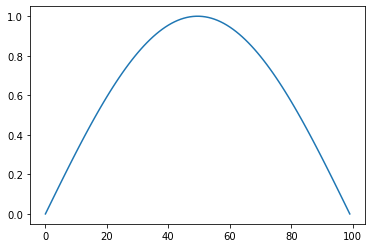

In [81]:
a = np.ones(100)
weights = np.sin(np.linspace(0, np.pi, len(a)))
plt.plot(weights)

In [105]:
import time
start = time.time()
newArr = np.array([])
for T in Sensor1['Temp [°C]']:
    newArr = np.append(newArr, T**2)
finish = time.time()
res = finish - start
res_msec = res * 1000
print('Время работы в миллисекундах: ', res_msec)

Время работы в миллисекундах:  34.94119644165039


In [113]:
start = time.time()
newArr = np.zeros(Sensor1['Temp [°C]'].shape[0])
for i, T in enumerate(Sensor1['Temp [°C]']):
    newArr[i] = T**2
finish = time.time()
res = finish - start
res_msec = res * 1000
print('Время работы в миллисекундах: ', res_msec)

Время работы в миллисекундах:  2.9528141021728516


In [117]:
print(Sensor1['Date/Time'])

0       2009-02-13 18:00:00
9       2009-02-13 18:05:00
16      2009-02-13 18:10:00
23      2009-02-13 18:15:00
30      2009-02-13 18:20:00
                ...        
20259   2009-02-23 05:40:00
20267   2009-02-23 05:45:00
20274   2009-02-23 05:50:00
20281   2009-02-23 05:55:00
20288   2009-02-23 06:00:00
Name: Date/Time, Length: 2737, dtype: datetime64[ns]


In [126]:
print(Sensor1['Date/Time'].dt.year)
print(Sensor1['Date/Time'].dt.month)
print(Sensor1['Date/Time'].dt.hour)
print(Sensor1['Date/Time'].dt.minute)
print(Sensor1['Date/Time'].dt.second)

In [ ]:
Sensor1['Date/Time'].diff()

In [139]:
(Sensor1['Date/Time'].diff()).dt.components.minutes

0        NaN
9        5.0
16       5.0
23       5.0
30       5.0
        ... 
20259    5.0
20267    5.0
20274    5.0
20281    5.0
20288    5.0
Name: minutes, Length: 2737, dtype: float64

In [142]:
print(Sensor1['Date/Time'])
dt = pd.Timedelta(days=1, hours=2)
Sensor1['Date/Time'] += dt
print(Sensor1['Date/Time'])

0       2009-02-13 18:00:00
9       2009-02-13 18:05:00
16      2009-02-13 18:10:00
23      2009-02-13 18:15:00
30      2009-02-13 18:20:00
                ...        
20259   2009-02-23 05:40:00
20267   2009-02-23 05:45:00
20274   2009-02-23 05:50:00
20281   2009-02-23 05:55:00
20288   2009-02-23 06:00:00
Name: Date/Time, Length: 2737, dtype: datetime64[ns]
0       2009-02-14 20:00:00
9       2009-02-14 20:05:00
16      2009-02-14 20:10:00
23      2009-02-14 20:15:00
30      2009-02-14 20:20:00
                ...        
20259   2009-02-24 07:40:00
20267   2009-02-24 07:45:00
20274   2009-02-24 07:50:00
20281   2009-02-24 07:55:00
20288   2009-02-24 08:00:00
Name: Date/Time, Length: 2737, dtype: datetime64[ns]


<ipython-input-142-09648d383bfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sensor1['Date/Time'] += dt
